In [48]:
import pandas as pd
datos = pd.read_csv('student_data_saludmental.csv',index_col=0, encoding='latin-1')

In [49]:
datos.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,M__teacher,F__at_home,F__health,F__otherFatherJob,F__services,F__teacher,G__father,G__mother,G__otherGuardian,Salud Mental
0,1,18,0,1,1,4,4,2,2,0,...,0,0,0,0,0,1,0,1,0,Transtorno de Aprendizaje
1,1,17,0,1,0,1,1,1,2,0,...,0,0,0,1,0,0,1,0,0,Transtorno de Alimentacion
2,1,15,0,0,0,1,1,1,2,3,...,0,0,0,1,0,0,0,1,0,Ansiedad
3,1,15,0,1,0,4,2,1,3,0,...,0,0,0,0,1,0,0,1,0,NaN
4,1,16,0,1,0,3,3,1,2,0,...,0,0,0,1,0,0,1,0,0,Transtorno de Alimentacion


In [50]:
datos_na = datos.dropna()

In [51]:
datos_na.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,M__teacher,F__at_home,F__health,F__otherFatherJob,F__services,F__teacher,G__father,G__mother,G__otherGuardian,Salud Mental
0,1,18,0,1,1,4,4,2,2,0,...,0,0,0,0,0,1,0,1,0,Transtorno de Aprendizaje
1,1,17,0,1,0,1,1,1,2,0,...,0,0,0,1,0,0,1,0,0,Transtorno de Alimentacion
2,1,15,0,0,0,1,1,1,2,3,...,0,0,0,1,0,0,0,1,0,Ansiedad
4,1,16,0,1,0,3,3,1,2,0,...,0,0,0,1,0,0,1,0,0,Transtorno de Alimentacion
6,0,16,0,0,0,2,2,1,2,0,...,0,0,0,1,0,0,0,1,0,Transtorno de Alimentacion


In [52]:
datos_na.count()

sex                  222
age                  222
address              222
famsize              222
Pstatus              222
Medu                 222
Fedu                 222
traveltime           222
studytime            222
failures             222
schoolsup            222
famsup               222
paid                 222
activities           222
nursery              222
higher               222
internet             222
romantic             222
famrel               222
freetime             222
goout                222
Dalc                 222
Walc                 222
health               222
absences             222
Promedio             222
M__at_home           222
M__nurse             222
M__otherMomJob       222
M__services          222
M__teacher           222
F__at_home           222
F__health            222
F__otherFatherJob    222
F__services          222
F__teacher           222
G__father            222
G__mother            222
G__otherGuardian     222
Salud Mental         222


In [53]:
datos_na.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Promedio',
       'M__at_home', 'M__nurse', 'M__otherMomJob', 'M__services', 'M__teacher',
       'F__at_home', 'F__health', 'F__otherFatherJob', 'F__services',
       'F__teacher', 'G__father', 'G__mother', 'G__otherGuardian',
       'Salud Mental'],
      dtype='object')

In [54]:
# Obtener una lista con los nombres de las columnas a conservar
columnas_a_conservar = ["Medu","Fedu","M__nurse","F__health","studytime","higher","age","address","failures","schoolsup","goout"]


In [55]:
X = datos_na.drop(columns=list(set(datos_na.columns) - set(columnas_a_conservar)),axis=1)

In [56]:
X.columns

Index(['age', 'address', 'Medu', 'Fedu', 'studytime', 'failures', 'schoolsup',
       'higher', 'goout', 'M__nurse', 'F__health'],
      dtype='object')

In [57]:
X.head()

,age,address,Medu,Fedu,studytime,failures,schoolsup,higher,goout,M__nurse,F__health
0,18,0,4,4,2,0,1,1,4,0,0
1,17,0,1,1,2,0,0,1,3,0,0
2,15,0,1,1,2,3,1,1,2,0,0
4,16,0,3,3,2,0,0,1,2,0,0
6,16,0,2,2,2,0,0,1,4,0,0


In [58]:
Y= datos_na["Salud Mental"]

In [59]:
Y.head()

0     Transtorno de Aprendizaje
1    Transtorno de Alimentacion
2                      Ansiedad
4    Transtorno de Alimentacion
6    Transtorno de Alimentacion
Name: Salud Mental, dtype: object

In [60]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, Y_ent, Y_pru = train_test_split(X,Y,test_size=0.2)

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
resultados=[]
for i in range(1,30):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent,Y_ent)
    predicciones = modelo.predict(X_pru)
    exactitud = accuracy_score(Y_pru, predicciones)
    print(f'Resultado para {i}: {exactitud}')
    resultados.append(exactitud)

Resultado para 1: 0.4222222222222222
Resultado para 2: 0.5111111111111111
Resultado para 3: 0.4666666666666667
Resultado para 4: 0.5777777777777777
Resultado para 5: 0.5333333333333333
Resultado para 6: 0.5333333333333333
Resultado para 7: 0.6666666666666666
Resultado para 8: 0.6666666666666666
Resultado para 9: 0.6444444444444445
Resultado para 10: 0.6666666666666666
Resultado para 11: 0.6444444444444445
Resultado para 12: 0.7111111111111111
Resultado para 13: 0.7111111111111111
Resultado para 14: 0.6666666666666666
Resultado para 15: 0.7111111111111111
Resultado para 16: 0.6888888888888889
Resultado para 17: 0.6666666666666666
Resultado para 18: 0.6888888888888889
Resultado para 19: 0.6888888888888889
Resultado para 20: 0.6444444444444445
Resultado para 21: 0.6888888888888889
Resultado para 22: 0.6888888888888889
Resultado para 23: 0.7111111111111111
Resultado para 24: 0.6888888888888889
Resultado para 25: 0.6444444444444445
Resultado para 26: 0.7111111111111111
Resultado para 27: 0.

In [62]:
import seaborn as sb

<Axes: >

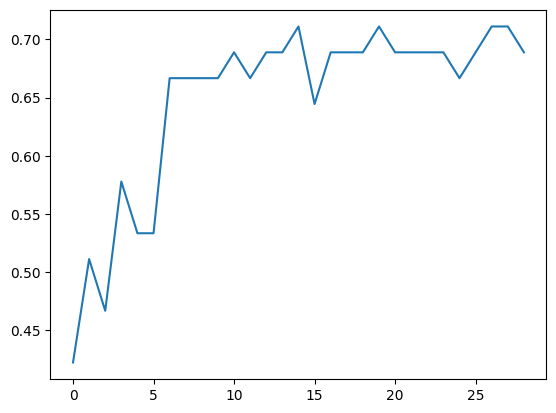

In [74]:
sb.lineplot(resultados)

In [75]:
max(resultados)

0.7111111111111111

In [91]:
modelo = DecisionTreeClassifier(max_depth=23)
modelo.fit(X_ent,Y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(Y_pru, predicciones)

In [93]:
exactitud

0.7111111111111111

In [78]:
from sklearn.tree import plot_tree

In [101]:
Y.value_counts()

Salud Mental
Transtorno de Alimentacion    98
TDAH                          40
Ansiedad                      32
Agresividad                   17
TEPT                          11
Transtorno de Aprendizaje     10
Depresión                      8
Cambio de Humor                6
Name: count, dtype: int64

[Text(0.6976102941176471, 0.9615384615384616, 'failures <= 0.5\n0.741\n177\n[16, 23, 2, 8, 32, 10, 78, 8]\nDepresión'),
 Text(0.4876575630252101, 0.8846153846153846, 'studytime <= 2.5\n0.642\n138\n[10, 22, 0, 2, 30, 0, 73, 1]\nDepresión'),
 Text(0.31985294117647056, 0.8076923076923077, 'Fedu <= 3.5\n0.582\n106\n[10, 4, 0, 2, 27, 0, 62, 1]\nDepresión'),
 Text(0.17752100840336135, 0.7307692307692307, 'age <= 16.5\n0.535\n83\n[10, 4, 0, 2, 13, 0, 54, 0]\nDepresión'),
 Text(0.08403361344537816, 0.6538461538461539, 'address <= 0.5\n0.275\n51\n[1, 1, 0, 0, 6, 0, 43, 0]\nDepresión'),
 Text(0.03361344537815126, 0.5769230769230769, 'higher <= 0.5\n0.129\n44\n[0, 1, 0, 0, 2, 0, 41, 0]\nDepresión'),
 Text(0.01680672268907563, 0.5, '0.0\n1\n[0, 1, 0, 0, 0, 0, 0, 0]\nTDAH'),
 Text(0.05042016806722689, 0.5, 'M__nurse <= 0.5\n0.089\n43\n[0, 0, 0, 0, 2, 0, 41, 0]\nDepresión'),
 Text(0.03361344537815126, 0.4230769230769231, 'Medu <= 3.5\n0.046\n42\n[0, 0, 0, 0, 1, 0, 41, 0]\nDepresión'),
 Text(0.016806

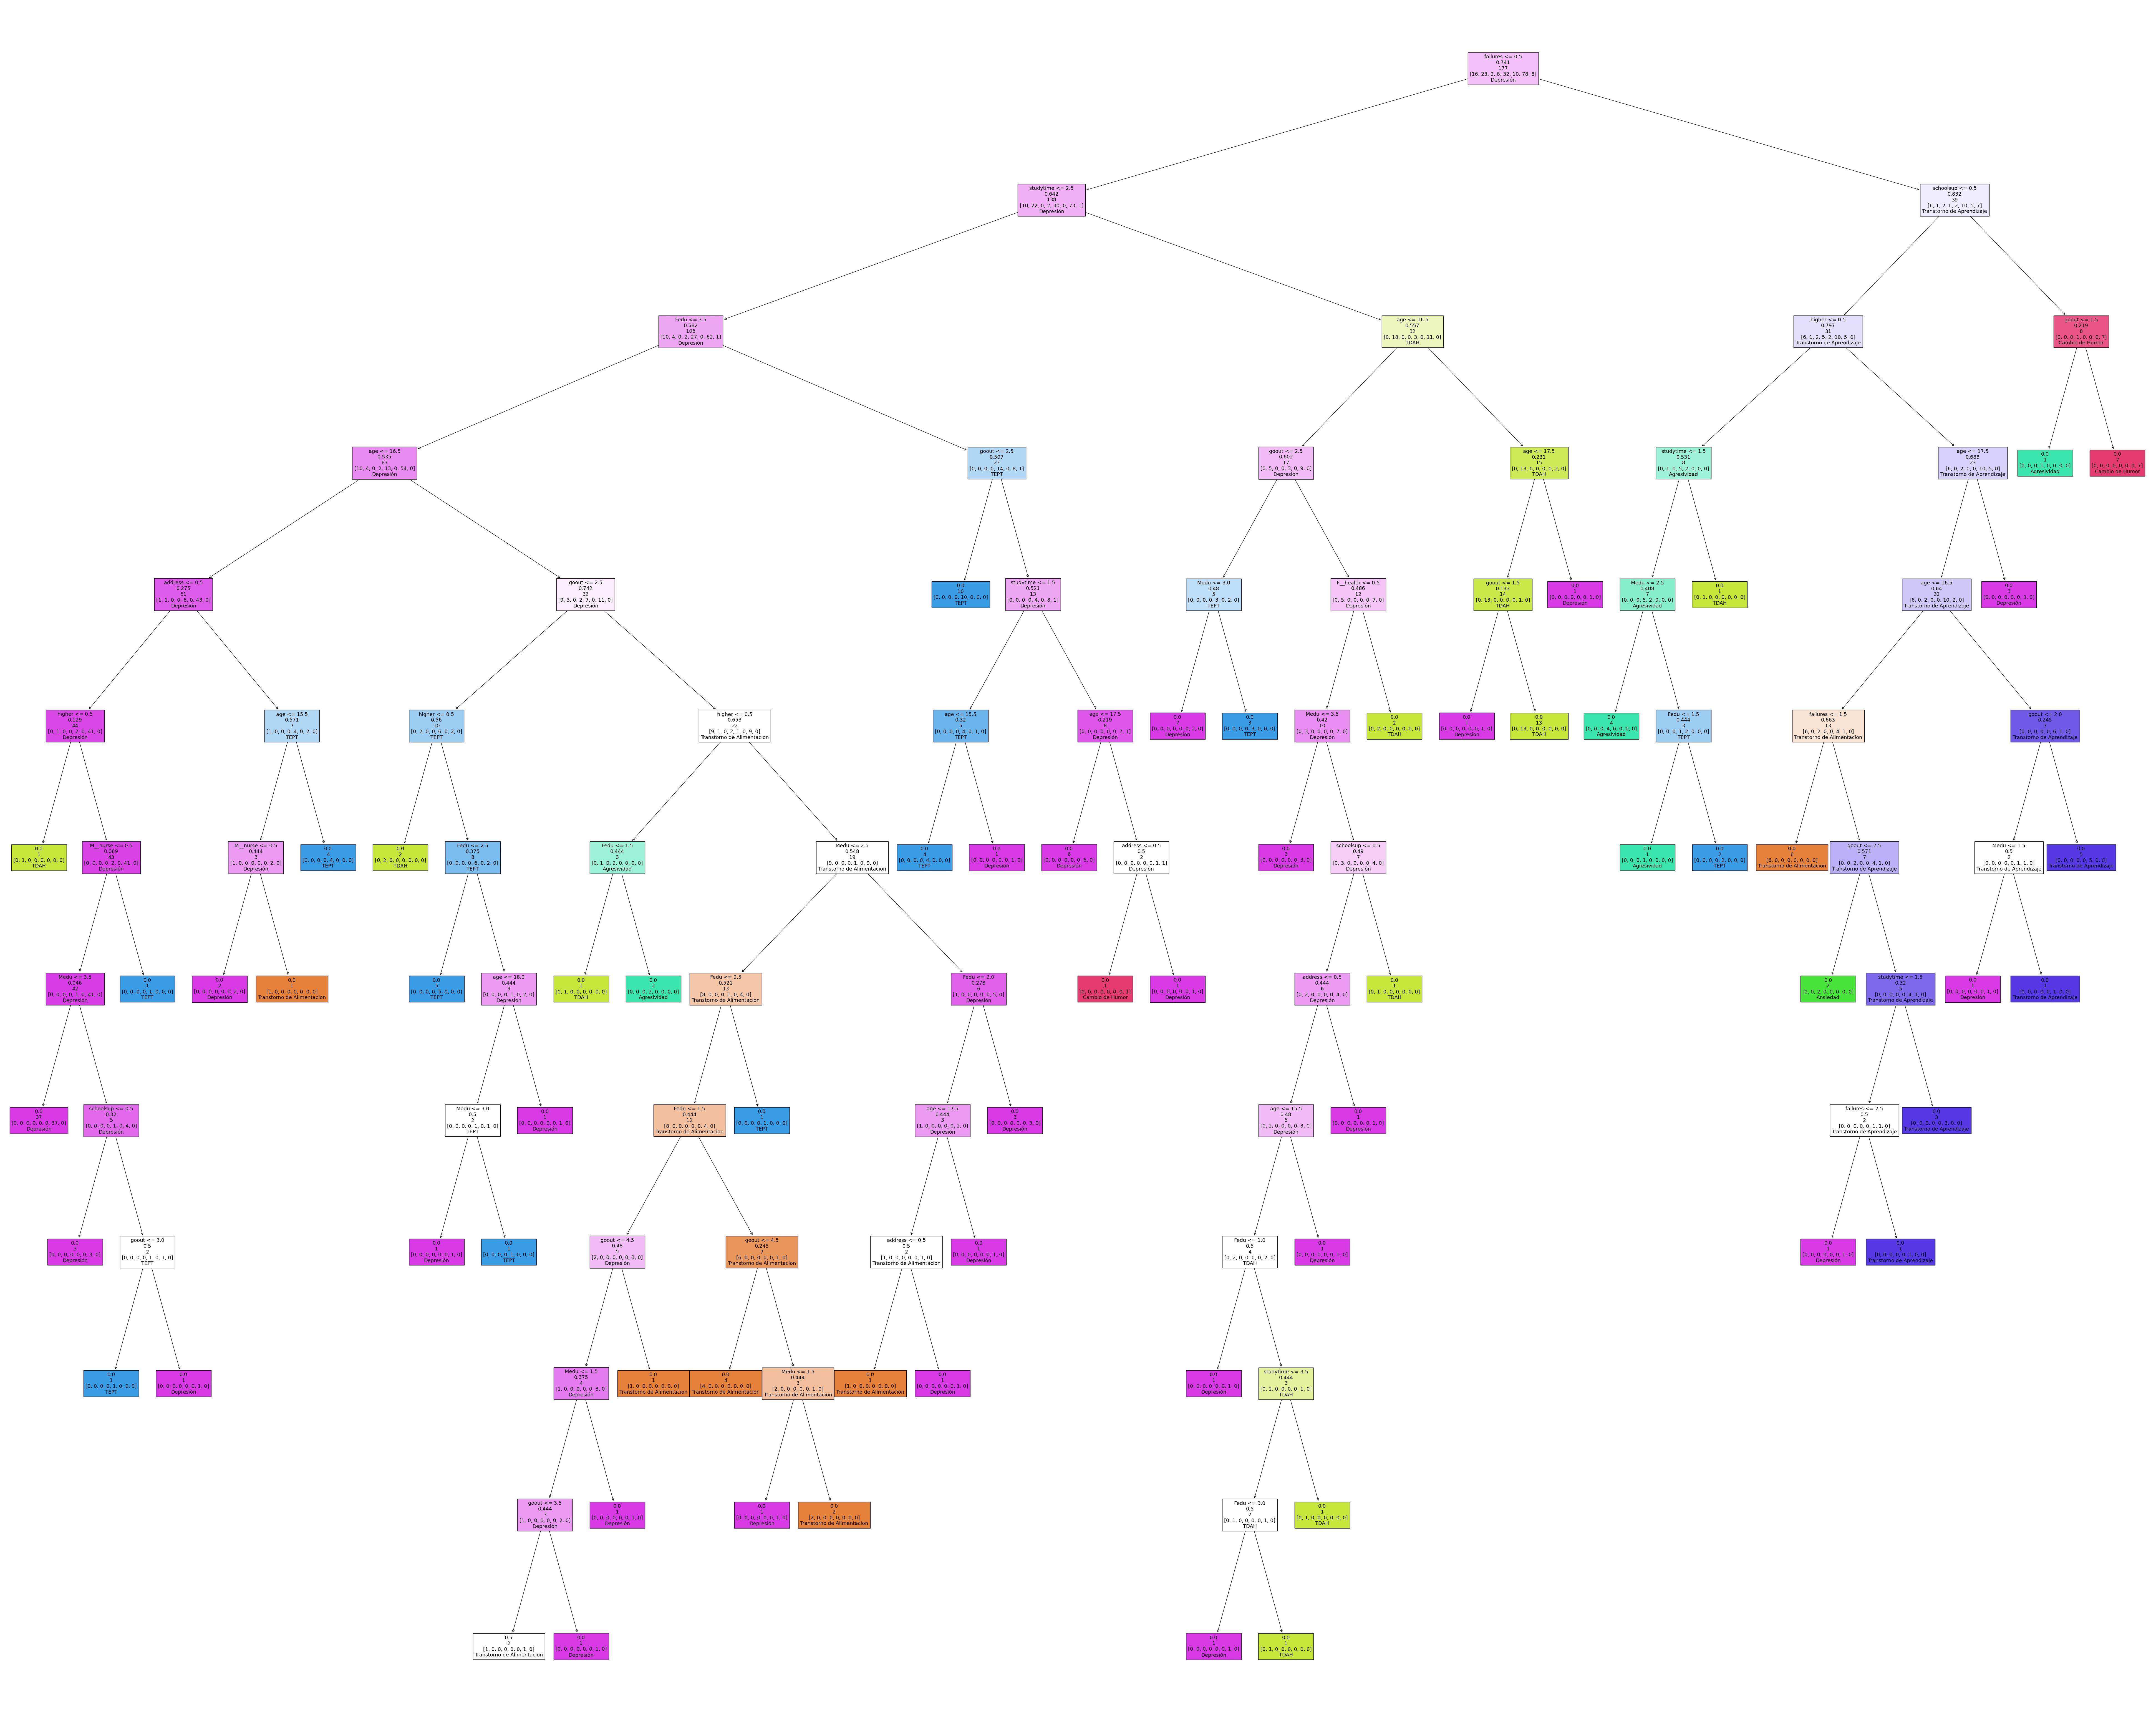

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=list(X_ent.columns),
    class_names=["Transtorno de Alimentacion","TDAH","Ansiedad","Agresividad","TEPT","Transtorno de Aprendizaje","Depresión","Cambio de Humor"],
    filled=True, label="none"
)

In [104]:
X.columns

Index(['age', 'address', 'Medu', 'Fedu', 'studytime', 'failures', 'schoolsup',
       'higher', 'goout', 'M__nurse', 'F__health'],
      dtype='object')

In [105]:
X_prediccion= ["15","0","1","1","3","0","0","1","3","0","0"]

In [106]:
prediccion = modelo.predict([X_prediccion])

h:\Proyectos\JupEnv\JpEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [107]:
prediccion

array(['Transtorno de Alimentacion'], dtype=object)

In [108]:
import joblib

In [110]:
joblib.dump(modelo, 'modelo.joblib')

['modelo.joblib']